<a href="https://colab.research.google.com/github/JeremySpradlin/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2/Jeremy_Spradlin_DS17_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [56]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

def find_mean(data):
  total = 0
  for i in data:
    total += i
  return total / (len(data) - 1) #Subtract 1 from the length of the list for sample calculations

def find_variance(data):
  mean = np.mean(data)
  return sum((s - mean)**2 for s in data) / (len(data) - 1)

def find_std(data):
  return find_variance(data) ** 0.5


print(find_mean(sales))
print(find_variance(sales))
print(find_std(sales))

3561.5
214387.90476190473
463.0204150595357


In [58]:
#Create a function that prints out all these values (For extra points)
def get_stats(data):
  print('The mean for the dataset is: ', find_mean(data))
  print('The variance for the dataset is: ', find_variance(data))
  print('The standard deviation for the dataset is: ', find_std(data))

get_stats(sales)

The mean for the dataset is:  3561.5
The variance for the dataset is:  214387.90476190473
The standard deviation for the dataset is:  463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

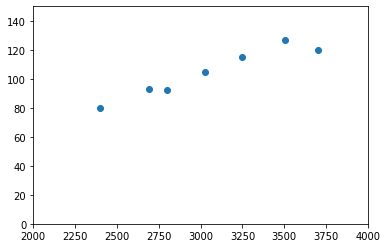

In [11]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

customers = [127, 80, 105, 92, 120, 115, 93]

plt.scatter(sales, customers)
plt.xlim(2000, 4000)
plt.ylim(0, 150)
plt.show()



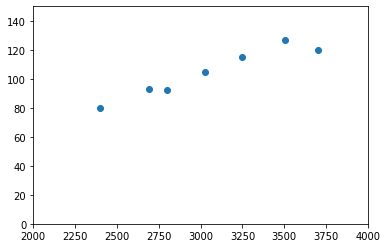

In [13]:
#Try it with a dataframe as was done in the lecture notes
sales_and_customers = {'sales': sales, 'customers': customers}

df = pd.DataFrame(sales_and_customers)

plt.scatter(df.sales, df.customers)
plt.xlim(2000, 4000)
plt.ylim(0, 150)
plt.show()

In [14]:
#check covariance with the numpy method
df.cov()

,sales,customers
sales,214387.904762,7604.357143
customers,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [25]:
df = pd.DataFrame({'sales': sales, 'customers': customers})
df.head()

,sales,customers
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120


In [36]:
std_sales = find_std(df['sales'])
std_customers = find_std(df['customers'])

print(std_sales)
print(std_customers)

463.0204150595357
17.057326313123664


In [37]:
cov = df['sales'].cov(df['customers'])
print(cov)

7604.357142857142


In [39]:
r = cov / (std_sales * std_customers)

print('The correlation cooeficient is: ', r)

The correlation cooeficient is:  0.9628339778148909


In [19]:
#Determine the standard deviation for each set


sales_std = find_std(sales)
customer_std = find_std(customers)

r = (np.cov(sales, customers) / (sales_std * customer_std))

print('The std for sales last week is: ', sales_std)
print('The std for customers last week is: ', customer_std)
print(r)

The std for sales last week is:  718.6060290590387
The std for customers last week is:  25.403411844343534
[[11.74403601  0.41656195]
 [ 0.41656195  0.01593819]]


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [23]:
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'

df = pd.read_csv(url)

df = df.select_dtypes(include='number')

print('The variance-covariance matrix for the dataframe is:')
df.cov()

The variance-covariance matrix for the dataframe is:


,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [24]:
#Calculate the correlation matrix for the dataframe

print('The correlation matrix for the dataframe is:')
df.corr()

The correlation matrix for the dataframe is:


,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

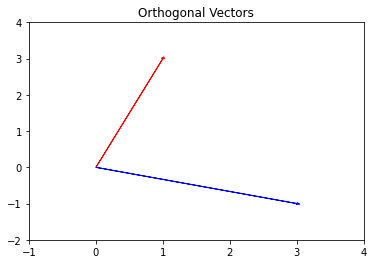

In [48]:
vector1 = [1, 3]
vector2 = [3, -1]

#Plot the vectors
plt.arrow(0, 0, vector1[0], vector1[1], head_width=.05, head_length=.05, color='red')
plt.arrow(0, 0, vector2[0], vector2[1], head_width=.05, head_length=.05, color='blue')
plt.title('Orthogonal Vectors')

plt.xlim(-1, 4)
plt.ylim(-2, 4)

plt.show()

#Orthogonal is synomymous with perpendicular

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [55]:
a = np.array([-5, 3, 7])
b = np.array([6, -8, 2])

print(np.dot(a, b))

-40


The vectors are not orthogonal because their dot product is not zero.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [71]:
c = np.array([2, -15, 6, 20])

q1 = np.linalg.norm(c)**2
q2 = np.dot(c, c)
q3 = np.dot(c.T, c)

print('The answer to question one is: ', q1)
print('The answer to question two is: ', q2)
print('The answer to question three is: ', q3)

The answer to question one is:  665.0
The answer to question two is:  665
The answer to question three is:  665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}

___

\begin{align}
e = \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0\end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0\end{bmatrix} - 8\begin{bmatrix} 0 \\ 0 \\ 1\end{bmatrix}= 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:



\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [74]:
f = np.array([4, 12, 11, 9, 2])

#Determine f's norm
fnorm = np.linalg.norm(f)
print(fnorm)

19.131126469708992


####Turning $f$ into a unit vector

Above we calculated $f$'s norm:
 \begin{align}
 ||f|| = \sqrt{4^2 + 12^2 + 11^2 + 9^2 + 2^2} = \sqrt{16 + 144 + 121 + 81 + 4} = \sqrt{366} = 19.13
\end{align}

Then we determine the unit vector by dividing each element by it's norm:

 \begin{align}
 \hat{f} = \frac{1}{||f||}f = \frac{1}{19.13}\begin{bmatrix} 4 & 12 & 11 & 9 & 2\end{bmatrix} = \begin{bmatrix} \frac{1}{3} \\ \frac{2}{3} \\  \frac{2}{3} \end{bmatrix}
\end{align}


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



## 6.2 What does it mean to form a basis?

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

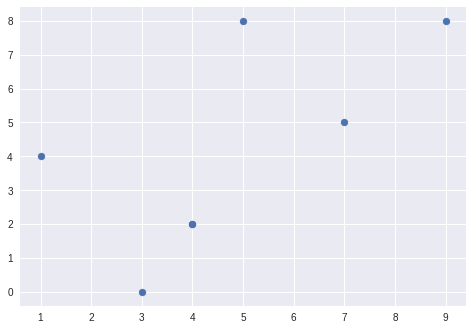

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()